In [1]:
#import different libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import sklearn.metrics as sm
from math import sqrt
from keras import models,layers
import matplotlib.pyplot as plt

In [2]:
#1.Load Data
car_data = pd.read_csv("CarPrice_Assignment.csv")
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
#2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )
car_data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [4]:
car_data.isnull().any()

car_ID              False
symboling           False
CarName             False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool

In [5]:
car_data.isnull()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
car_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


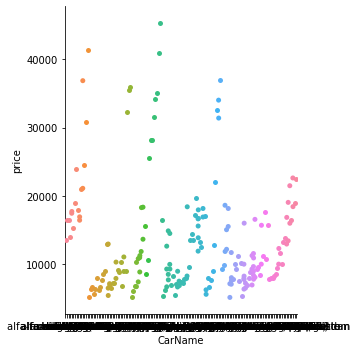

In [8]:
#Relational plot  between (string dtype)car features and price
sb.catplot(x="CarName", y="price", data=car_data)

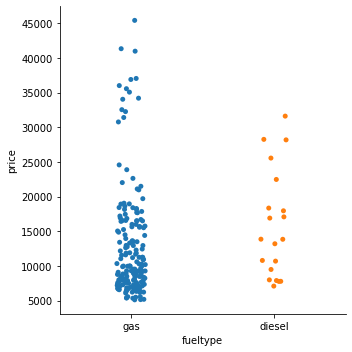

In [9]:
sb.catplot(x="fueltype", y="price", data=car_data)

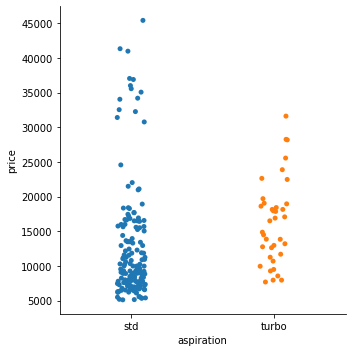

In [9]:
sb.catplot(x="aspiration", y="price", data=car_data)

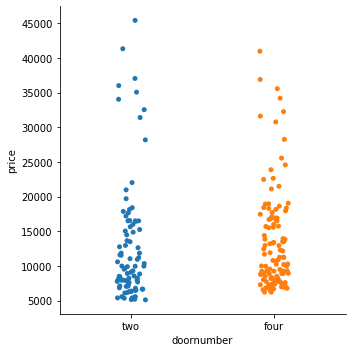

In [10]:
sb.catplot(x="doornumber", y="price", data=car_data)

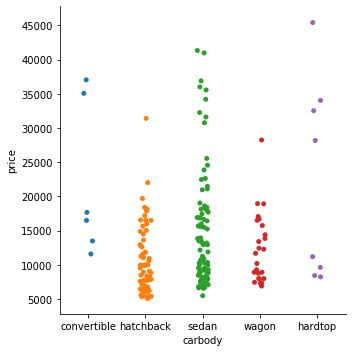

In [12]:
sb.catplot(x="carbody", y="price", data=car_data)

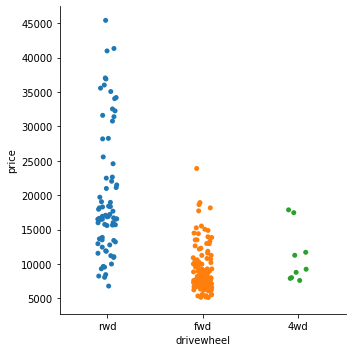

In [13]:
sb.catplot(x="drivewheel", y="price", data=car_data)

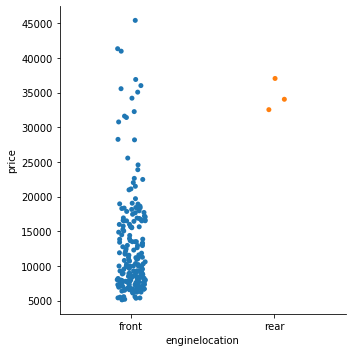

In [14]:
sb.catplot(x="enginelocation", y="price", data=car_data)

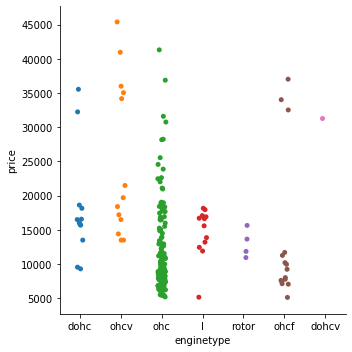

In [15]:
sb.catplot(x="enginetype", y="price", data=car_data)

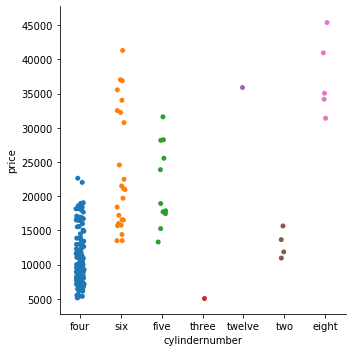

In [16]:
sb.catplot(x="cylindernumber", y="price", data=car_data)

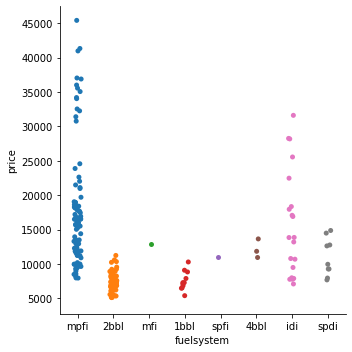

In [17]:
sb.catplot(x="fuelsystem", y="price", data=car_data)

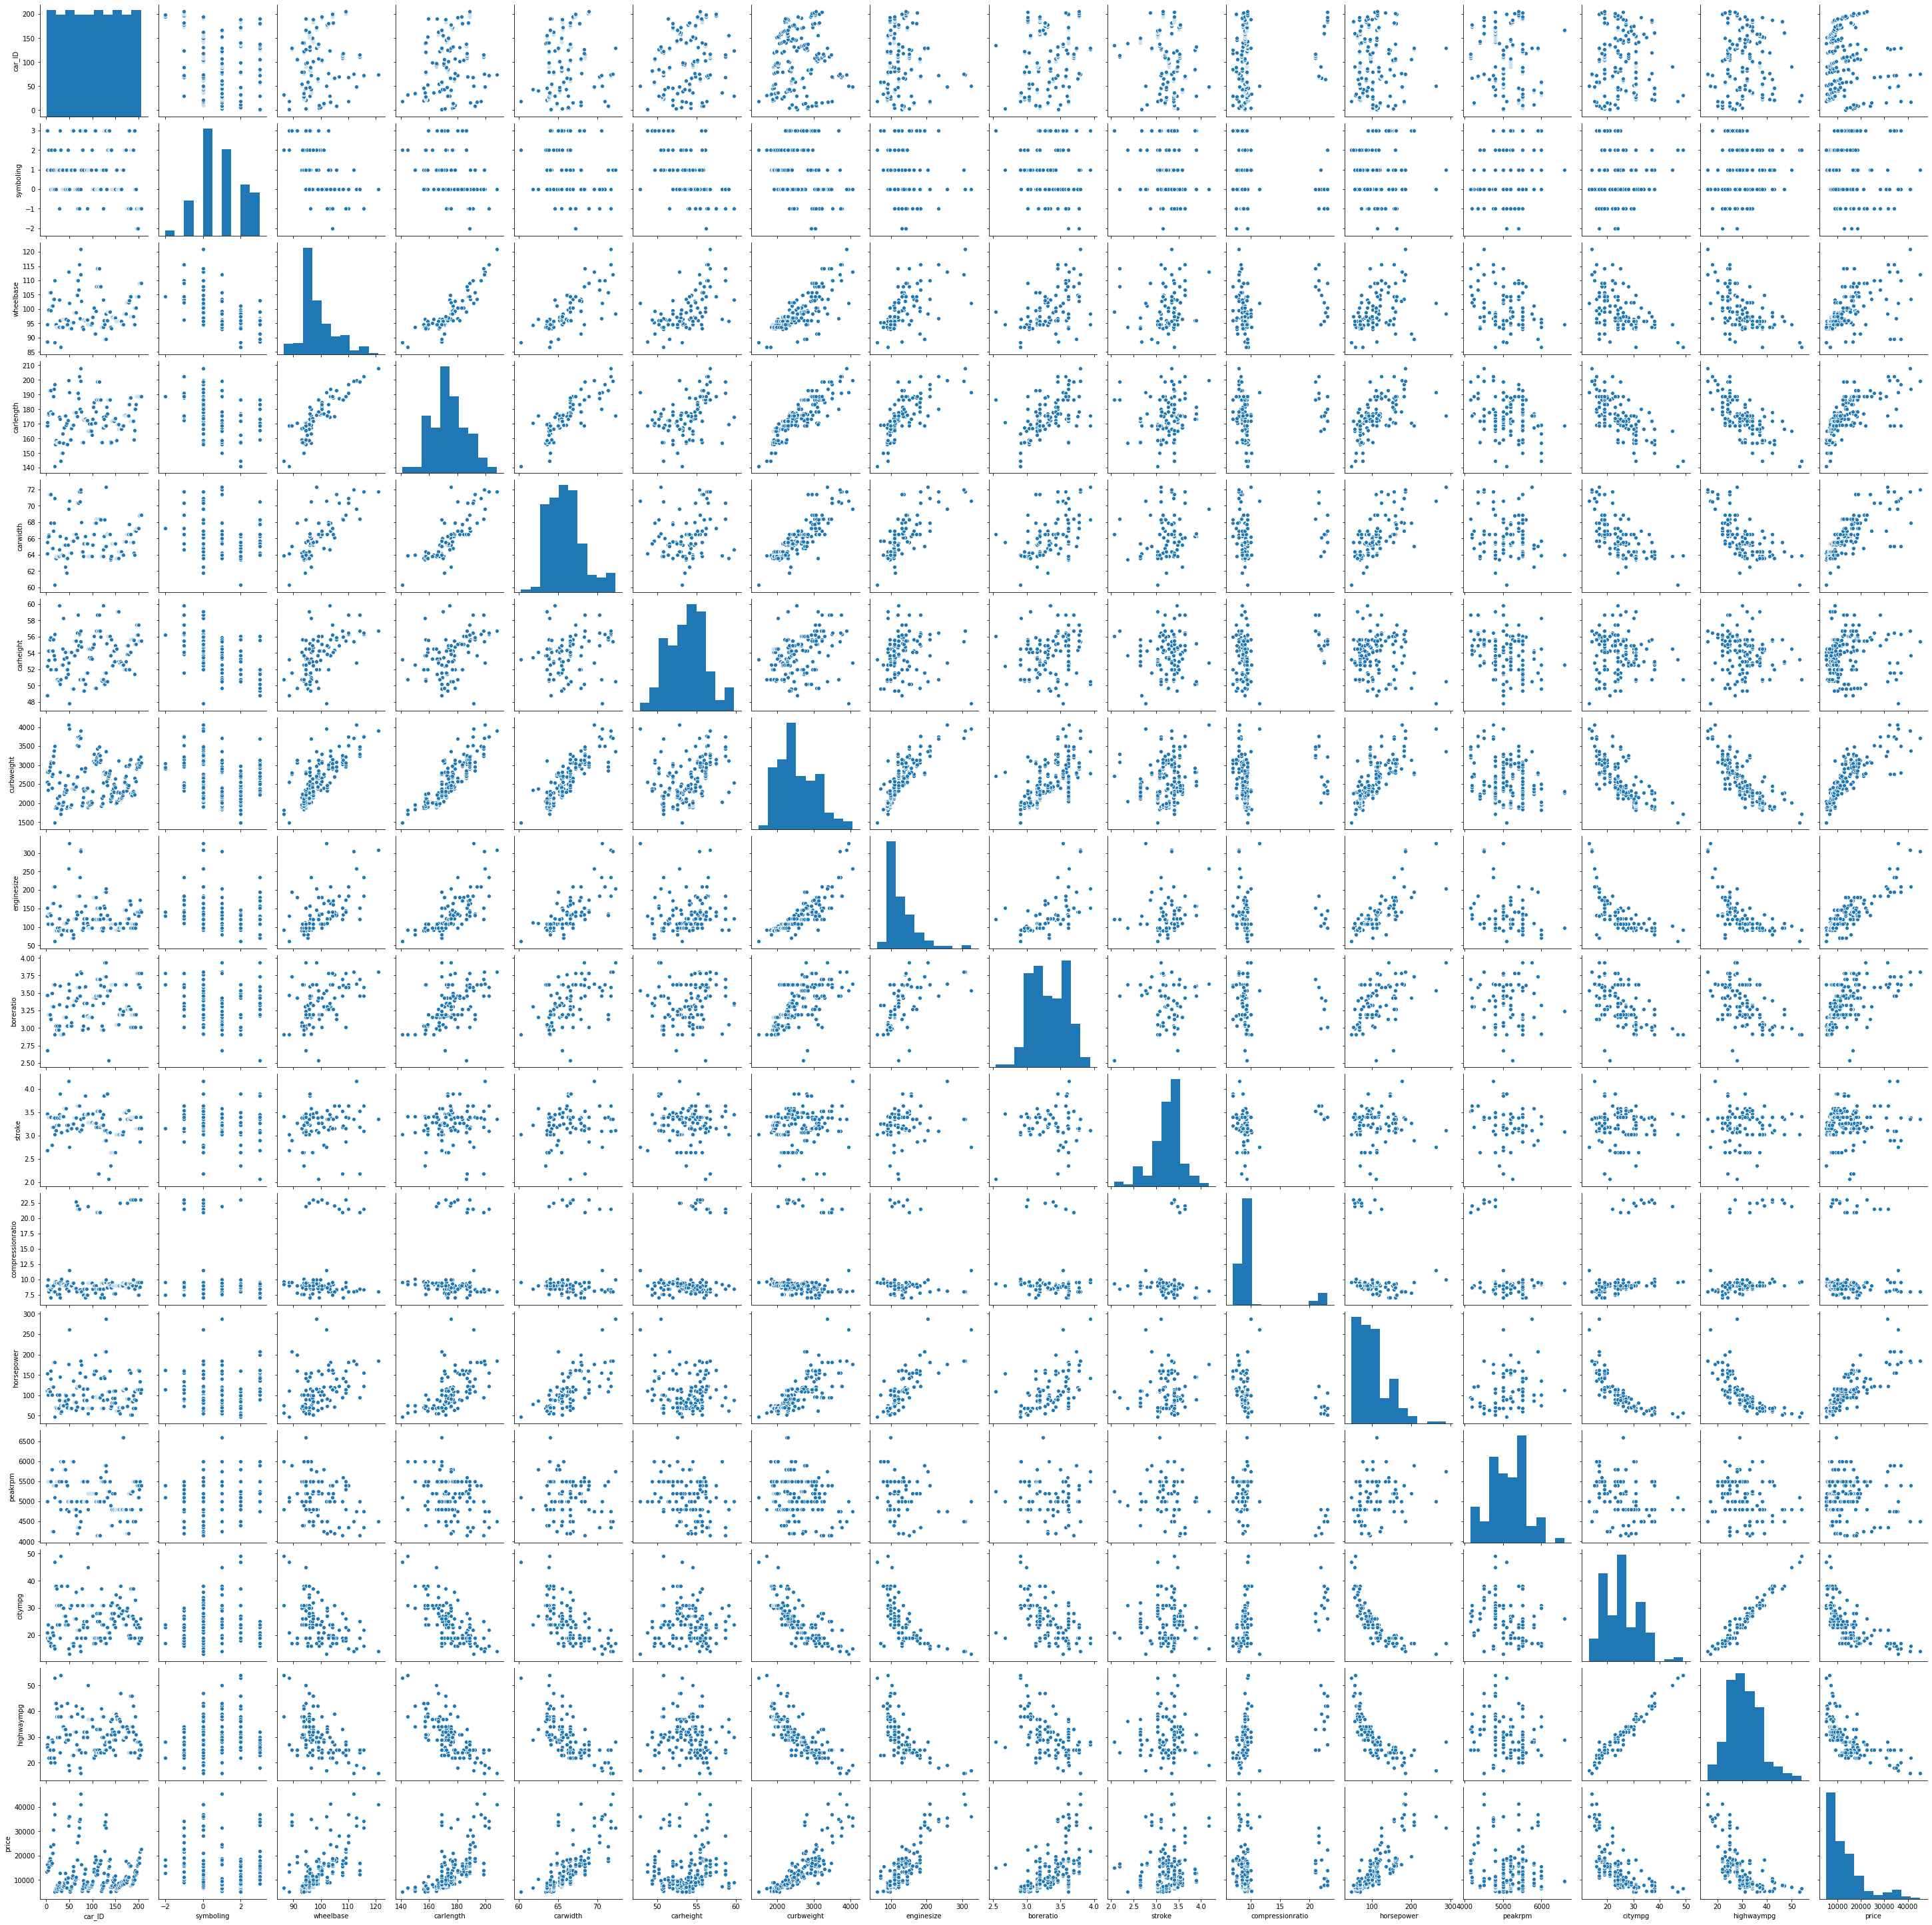

In [18]:
#Relational Plot between numerical car features and price
sb.pairplot(car_data)

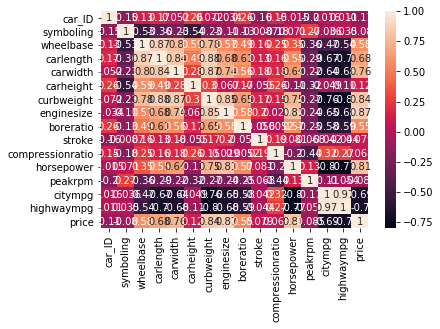

In [19]:
sb.heatmap(car_data.corr(),annot=True)

In [ ]:
#sb.pairplot(hue="price", data=car_data,diag_kind="hist")

In [20]:
#spliting car data into car features and car price
car_features = car_data.iloc[:,:-1]
car_price = car_data.iloc[:,-1:]

In [21]:
print(car_features.shape)
print(car_price.shape)

(205, 25)
(205, 1)


In [22]:
# Encoding object dtype car features
labelencoder = LabelEncoder()
car_features['fueltype'] = labelencoder.fit_transform(car_features['fueltype'])
car_features['aspiration'] = labelencoder.fit_transform(car_features['aspiration'])
car_features['carbody'] = labelencoder.fit_transform(car_features['carbody'])
car_features['drivewheel'] = labelencoder.fit_transform(car_features['drivewheel'])
car_features['enginelocation'] = labelencoder.fit_transform(car_features['enginelocation'])
car_features['CarName']= labelencoder.fit_transform(car_features['CarName'])
car_features['doornumber']= labelencoder.fit_transform(car_features['doornumber'])
car_features['enginetype']= labelencoder.fit_transform(car_features['enginetype'])
car_features['cylindernumber']= labelencoder.fit_transform(car_features['cylindernumber'])
car_features['fuelsystem']= labelencoder.fit_transform(car_features['fuelsystem'])

In [23]:
#Drop the car_ID column from car_features
car_features = car_features.drop(['car_ID'],axis = 1)
car_features.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,2,1,0,1,0,2,0,88.6,168.8,...,2,130,5,3.47,2.68,9.0,111,5000,21,27
1,3,3,1,0,1,0,2,0,88.6,168.8,...,2,130,5,3.47,2.68,9.0,111,5000,21,27
2,1,1,1,0,1,2,2,0,94.5,171.2,...,3,152,5,2.68,3.47,9.0,154,5000,19,26
3,2,4,1,0,0,3,1,0,99.8,176.6,...,2,109,5,3.19,3.40,10.0,102,5500,24,30
4,2,5,1,0,0,3,0,0,99.4,176.6,...,1,136,5,3.19,3.40,8.0,115,5500,18,22


In [24]:
#3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
train_features,test_features,train_price,test_price = train_test_split(car_features,car_price,test_size=0.3,random_state=0)

In [25]:
print(train_features.shape)
print(test_features.shape)
print(train_price.shape)
print(test_price.shape)

(143, 24)
(62, 24)
(143, 1)
(62, 1)


In [26]:
#Normalization
mean = train_features.mean(axis=0)
train_features -= mean
std = train_features.std(axis=0)
train_features /= std
test_features -= mean
test_features /= std

In [27]:
train_features.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
40,-0.568876,-1.015492,0.366029,-0.5026,-0.799485,0.418529,-0.649531,-0.145872,-0.399203,0.074270,...,-0.196985,-0.422477,-1.562391,-0.722642,1.064573,-0.325740,-0.472919,1.340474,0.329613,0.400708
60,-0.568876,-0.498974,0.366029,-0.5026,-0.799485,0.418529,-0.649531,-0.145872,-0.031731,0.273405,...,-0.196985,-0.138175,-1.066999,0.181187,0.404122,-0.418245,-0.525425,-0.622535,0.163060,0.244147
56,1.823750,-0.572762,0.366029,-0.5026,1.242058,-0.710710,1.171702,-0.145872,-0.590928,-0.456758,...,4.924627,-1.370152,-0.571606,-0.044770,-0.065146,-0.233235,-0.079126,1.733076,-1.335924,-1.164900
101,-0.568876,-0.154629,0.366029,-0.5026,-0.799485,0.418529,-0.649531,-0.145872,0.223902,0.597000,...,1.083418,1.259645,0.914570,0.331826,-0.013005,-0.325740,1.259771,0.162669,-1.335924,-1.321461
86,0.228666,-0.203821,0.366029,-0.5026,-0.799485,0.418529,-0.649531,-0.145872,-0.431157,-0.174650,...,-0.196985,-0.138175,-1.066999,0.030549,0.647446,-0.441371,-0.420413,-0.229933,-0.003494,0.244147


In [28]:
#4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
#5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it) 
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(10,activation="relu",input_shape=(train_features.shape[1],)))
    model.add(layers.Dense(8,activation="relu"))
    model.add(layers.Dense(6,activation="relu"))
    model.add(layers.Dense(1))
    model.compile(optimizer="adam",loss = "mse",metrics = ["mse"])
    return model

In [29]:
#6.Train the Model with Epochs (100) and validate it
#7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
model = build_model()
history = model.fit(train_features,train_price, batch_size=2, epochs=100, verbose=1, validation_split=0.2)

Epoch 1/100
57/57 [==============================] - 1s 11ms/step - loss: 174839586.3448 - mse: 174839586.3448 - val_loss: 266584384.0000 - val_mse: 266584384.0000
Epoch 2/100
57/57 [==============================] - 0s 2ms/step - loss: 222041916.8276 - mse: 222041916.8276 - val_loss: 266580624.0000 - val_mse: 266580624.0000
Epoch 3/100
57/57 [==============================] - 0s 2ms/step - loss: 251396382.3448 - mse: 251396382.3448 - val_loss: 266577808.0000 - val_mse: 266577808.0000
Epoch 4/100
57/57 [==============================] - 0s 2ms/step - loss: 202985185.5172 - mse: 202985185.5172 - val_loss: 266555952.0000 - val_mse: 266555952.0000
Epoch 5/100
57/57 [==============================] - 0s 1ms/step - loss: 219329230.6207 - mse: 219329230.6207 - val_loss: 266515216.0000 - val_mse: 266515216.0000
Epoch 6/100
57/57 [==============================] - 0s 2ms/step - loss: 197414476.6207 - mse: 197414476.6207 - val_loss: 266434944.0000 - val_mse: 266434944.0000
Epoch 7/100
57/57 [==

57/57 [==============================] - 0s 2ms/step - loss: 28385188.6552 - mse: 28385188.6552 - val_loss: 20245490.0000 - val_mse: 20245490.0000
Epoch 52/100
57/57 [==============================] - 0s 1ms/step - loss: 26922064.1034 - mse: 26922064.1034 - val_loss: 19725468.0000 - val_mse: 19725468.0000
Epoch 53/100
57/57 [==============================] - 0s 1ms/step - loss: 26464803.2241 - mse: 26464803.2241 - val_loss: 19164052.0000 - val_mse: 19164052.0000
Epoch 54/100
57/57 [==============================] - 0s 1ms/step - loss: 26207257.9828 - mse: 26207257.9828 - val_loss: 18610098.0000 - val_mse: 18610098.0000
Epoch 55/100
57/57 [==============================] - 0s 2ms/step - loss: 31380824.2317 - mse: 31380824.2317 - val_loss: 18125748.0000 - val_mse: 18125748.0000
Epoch 56/100
57/57 [==============================] - 0s 1ms/step - loss: 33346322.4138 - mse: 33346322.4138 - val_loss: 17632072.0000 - val_mse: 17632072.0000
Epoch 57/100
57/57 [==============================] -

In [30]:
#8.Evaluation Step
train_mse = model.evaluate(train_features, train_price, verbose=1)
test_mse = model.evaluate(test_features, test_price, verbose=1)

2/2 [==============================] - 0s 16ms/step - loss: 10010998.0000 - mse: 10010998.0000


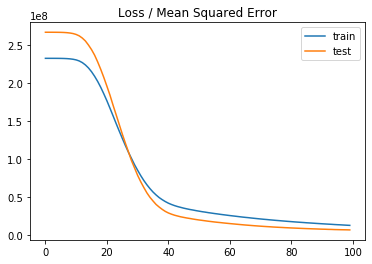

In [31]:
#Ploting
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [32]:
#9.Prediction
pred_train = model.predict(train_features)
print(np.sqrt(mean_squared_error(train_price,pred_train)))

pred = model.predict(test_features)
print(np.sqrt(mean_squared_error(test_price,pred)))

3437.8300999210487
3164.0161025424673


In [33]:
print("Mean absolute error =", round(sm.mean_absolute_error(test_price, pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(test_price, pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(test_price, pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(test_price, pred), 2)) 
print("R2 score =", round(sm.r2_score(test_price, pred), 2))

Mean absolute error = 2406.21
Mean squared error = 10010997.9
Median absolute error = 1899.77
Explain variance score = 0.85
R2 score = 0.85
